In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/stepik/m5. tasks/w1. time-series'
#/w1. time-series'
!ls

/content/drive/MyDrive/Colab Notebooks/stepik/m5. tasks/w1. time-series
'1.2 monthly-milk-production.ipynb'   monthly-milk-production.csv
'1.4 monthly-milk-production.ipynb'


In [4]:
import pandas as pd
data = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


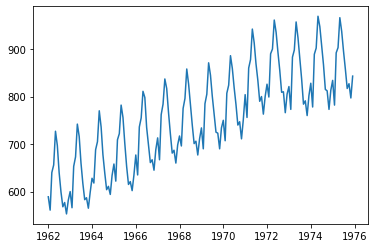

In [5]:
import matplotlib.pyplot as plt
plt.plot(data.index, data.milk)

In [6]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(data.milk.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-1.3038115874221299,
 0.6274267086030314,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

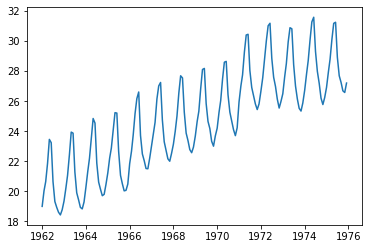

In [7]:
data['daily'] = data['milk'] / data.index.daysinmonth
data.head()
plt.plot(data.index, data.daily)
plt.show()

In [14]:
data.daily_diff1 = data.daily - data.daily.shift(1)
daily_diff1 = data.daily_diff1[data.daily_diff1.notna()]
sm.tsa.stattools.adfuller(daily_diff1)

(-2.7594694762289143,
 0.0643005465417464,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.880374082105334},
 -1.1539973381055688)

In [16]:
data.daily_diff2 = data.daily - data.daily.shift(12)
daily_diff2 = data.daily_diff2[data.daily_diff2.notna()]
sm.tsa.stattools.adfuller(daily_diff2)

(-2.1594860932888063,
 0.22127672658830438,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [18]:
data.daily_diff3 = data.daily_diff2 - data.daily.shift(1)
daily_diff3 = data.daily_diff3[data.daily_diff3.notna()]
sm.tsa.stattools.adfuller(daily_diff3)

(-1.3525104299962514,
 0.6048198087307753,
 14,
 141,
 {'1%': -3.4776006742422374,
  '10%': -2.5778219289774156,
  '5%': -2.882265832283648},
 151.05674901186376)

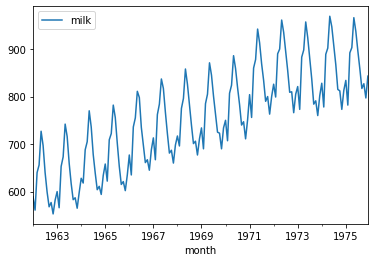

In [21]:
import pandas as pd
import numpy as np
milk = pd.read_csv("monthly-milk-production.csv",";", index_col=["month"], parse_dates=["month"], dayfirst=True)
milk.head()

average_day_milk = data
# pd.DataFrame(
#     map(lambda index, row: float(row["milk"])/index.days_in_month, milk.iterrows()),
#     milk.index,
#     ["milk"])
average_day_milk.plot()

# diff_average_day_milk = (average_day_milk - average_day_milk.shift(1)).dropna(thresh=1)
# # Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:
# #%%
# diff_average_day_milk_season = (average_day_milk - average_day_milk.shift(12)).dropna(thresh=1)
# d2_average_day_milk = (diff_average_day_milk_season - diff_average_day_milk_season.shift(1)).dropna(thresh=1)
# # При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN).
# # Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите
# # неопределённый достигаемый уровень значимости.
# # Итак, какое дифференцирование делает ряд стационарным?
# #%%
# import statsmodels.api as sm
# (adm_adf,adm_pvalue,adm_usedlag,adm_nobes,adm_icbest,adm_resstore) = sm.tsa.stattools.adfuller(average_day_milk["milk"])
# (dadm_adf,dadm_pvalue,dadm_usedlag,dadm_nobes,dadm_icbest,dadm_resstore) = sm.tsa.stattools.adfuller(diff_average_day_milk["milk"])
# (sdadm_adf,sdadm_pvalue,sdadm_usedlag,sdadm_nobes,sdadm_icbest,sdadm_resstore) = sm.tsa.stattools.adfuller(diff_average_day_milk_season["milk"])
# (d2adm_adf,d2adm_pvalue,d2adm_usedlag,d2adm_nobes,d2adm_icbest,d2adm_resstore) = sm.tsa.stattools.adfuller(d2_average_day_milk["milk"])
# print "Initial p-value: %.4f\nDiff p-value: %.4f\nSeason diff p-value: %.4f\nDiff after season diff p-value: %f" % (adm_pvalue, dadm_pvalue, sdadm_pvalue, d2adm_pvalue)

# # Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте
# # график автокорреляционной функции. Это можно cделать так:
# #%%
# sm.graphics.tsa.plot_acf(d2_average_day_milk.values.squeeze(), lags=50)
# # Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

# # Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции.
# # Это можно сделать так:
# #%%
# sm.graphics.tsa.plot_pacf(d2_average_day_milk.values.squeeze(), lags=50)
# # Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?
